In [1]:
import cv2
from bag_reader.bag_reader import READER
import numpy as np
import pandas as pd 

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


In [3]:
data = READER('/home/zion/catkin_ws/src/ros_env_prediction/env_recorder_pkg/bag/2022-11-06-15-43-58.bag')
data.read()



[INFO]  Data folder /home/zion/catkin_ws/src/ros_env_prediction/env_recorder_pkg/bag/2022-11-06-15-43-58 already exists. Not creating.


In [4]:
data.depth_df.head()

,Unnamed: 0,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,height,width,encoding,is_bigendian,step,frame_path,np_path
0,0,1.667742e+09,1495,1667742238,547671658,zedm_left_camera_optical_frame,360,640,32FC1,0,2560,/home/zion/catkin_ws/src/ros_env_prediction/en...,/home/zion/catkin_ws/src/ros_env_prediction/en...
1,1,1.667742e+09,1496,1667742238,681184658,zedm_left_camera_optical_frame,360,640,32FC1,0,2560,/home/zion/catkin_ws/src/ros_env_prediction/en...,/home/zion/catkin_ws/src/ros_env_prediction/en...
2,2,1.667742e+09,1497,1667742238,747685658,zedm_left_camera_optical_frame,360,640,32FC1,0,2560,/home/zion/catkin_ws/src/ros_env_prediction/en...,/home/zion/catkin_ws/src/ros_env_prediction/en...
3,3,1.667742e+09,1498,1667742238,814443658,zedm_left_camera_optical_frame,360,640,32FC1,0,2560,/home/zion/catkin_ws/src/ros_env_prediction/en...,/home/zion/catkin_ws/src/ros_env_prediction/en...
4,4,1.667742e+09,1499,1667742238,884177658,zedm_left_camera_optical_frame,360,640,32FC1,0,2560,/home/zion/catkin_ws/src/ros_env_prediction/en...,/home/zion/catkin_ws/src/ros_env_prediction/en...


In [87]:
depth = np.load(data.depth_df.np_path[5])
print(depth.dtype)
depth



float32


array([[       nan,        nan,        nan, ..., 1.2538222 , 1.2525522 ,
        1.2525487 ],
       [       nan,        nan,        nan, ..., 1.2538303 , 1.2525504 ,
        1.2525482 ],
       [       nan,        nan,        nan, ..., 1.2516563 , 1.2507132 ,
        1.250697  ],
       ...,
       [       nan,        nan,        nan, ..., 0.28433007, 0.28442386,
        0.28442246],
       [       nan,        nan,        nan, ..., 0.28437725, 0.28446653,
        0.2844672 ],
       [       nan,        nan,        nan, ..., 0.2843795 , 0.28446698,
        0.28446802]], dtype=float32)

In [69]:
np.nan_to_num(depth,0)
cv_img = data.get_depth_normalization(depth)
cv_img

array([[254.99998, 254.99998, 254.99998, ..., 254.99998, 254.99998,
        254.99998],
       [254.99998, 254.99998, 254.99998, ..., 254.99998, 254.99998,
        254.99998],
       [254.99998, 254.99998, 254.99998, ..., 254.99998, 254.99998,
        254.99998],
       ...,
       [254.99998, 254.99998, 254.99998, ..., 254.99998, 254.99998,
        254.99998],
       [254.99998, 254.99998, 254.99998, ..., 254.99998, 254.99998,
        254.99998],
       [254.99998, 254.99998, 254.99998, ..., 254.99998, 254.99998,
        254.99998]], dtype=float32)

In [75]:
cv2.imwrite('somthing.jpg',depth)


True

In [73]:
cv_img = data.get_depth_normalization(depth)
cv_img

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [88]:
cv_img = np.nan_to_num(depth,0)

#depth_copy = depth_copy*255
cv2.imwrite('somthing.jpg',cv_img*255)

/home/zion/py3.7_ws/py3.7_venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in multiply
  after removing the cwd from sys.path.


True

In [4]:
depth[depth == 0] = np.nan
print(depth)

[[  nan   nan   nan ... 1006. 1016. 1017.]
 [  nan   nan   nan ... 1014. 1017. 1017.]
 [  nan   nan   nan ... 1017. 1017. 1035.]
 ...
 [  nan   nan   nan ...   nan   nan   nan]
 [  nan   nan   nan ...   nan   nan   nan]
 [  nan   nan   nan ...   nan   nan   nan]]


In [5]:
means = np.nanmean(depth, axis=1)
print(means)

[1660.6459  1682.3295  1727.8492  1741.945   1739.9857  1747.2198
 1755.2212  1741.3501  1755.4584  1756.5986  1753.3     1749.3846
 1747.3932  1752.9276  1755.8778  1759.2998  1755.1532  1750.773
 1754.3268  1754.694   1747.7258  1751.2891  1747.3285  1758.8677
 1773.5018  1787.4419  1788.7957  1791.2875  1796.9008  1808.4025
 1836.6888  1826.3849  1836.3417  1860.1473  1830.6344  1841.741
 1834.1583  1853.1622  1849.9758  1848.5736  1834.3185  1831.0881
 1834.7539  1821.8053  1834.8806  1839.4735  1836.3121  1861.3622
 1840.6648  1857.9658  1849.5743  1871.9238  1875.1904  1889.4894
 1884.0565  1882.5725  1883.3314  1862.2307  1849.1044  1841.334
 1837.0704  1816.7441  1814.9529  1812.7106  1823.509   1823.902
 1814.218   1797.4877  1801.4458  1814.2957  1826.6593  1833.1053
 1815.508   1808.4371  1809.4265  1812.4681  1807.8549  1807.6428
 1817.0277  1805.116   1808.666   1779.2479  1791.436   1790.516
 1792.1409  1773.7285  1751.4581  1736.0942  1707.9521  1670.9458
 1659.835   165

In [6]:
width = depth.shape[0]
length = depth.shape[1]
w_sections = np.linspace(0,width,4)
w_sections = np.array(w_sections, dtype=np.uint16)
print(w_sections)
l_sections = np.linspace(0,length,5)
l_sections = np.array(l_sections, dtype=np.uint16)
print(l_sections)

[  0 120 240 360]
[  0 160 320 480 640]


In [39]:
d11 = depth[:(w_sections[1]),:(l_sections[1])]
print(d11.shape)


(120, 160)


In [45]:
# take the local average
print(np.nanmean(d11, axis=1)/1000)
# take the standard deviation
print(np.nanstd(d11)/1000)


[0.5746491  0.5726957  0.5728348  0.57302606 0.574193   0.57454866
 0.5737391  0.5741579  0.5743826  0.5748608  0.5752869  0.5747652
 0.5749483  0.5753793  0.57575    0.5773217  0.5772759  0.5777586
 0.5794211  0.5784741  0.5790431  0.57975656 0.58004344 0.5802105
 0.5807895  0.5806522  0.5813017  0.5811062  0.58202606 0.5830351
 0.5837069  0.58496493 0.58459485 0.5854435  0.58622605 0.5870965
 0.5875929  0.5873913  0.5884737  0.58556634 0.5873947  0.5894649
 0.58754784 0.58914655 0.5891842  0.5903684  0.5901293  0.5900263
 0.59117115 0.5914123  0.5899099  0.59045875 0.5926754  0.5924821
 0.5928839  0.5950261  0.5934956  0.59196293 0.5959159  0.5961875
 0.59541965 0.5993091  0.59569025 0.59658617 0.59717387 0.5978696
 0.5982956  0.5983707  0.5998761  0.60067856 0.5993839  0.5988018
 0.59910345 0.60142857 0.6012696  0.60037833 0.6008947  0.6034602
 0.60485584 0.6025455  0.6004911  0.60165215 0.60126317 0.6063036
 0.6008125  0.6036363  0.604      0.6042193  0.60873395 0.6050088
 0.604711

In [7]:
tiles = [depth[x:x+int(w_sections[1]),y:y+int(l_sections[1])] for x in range(0,depth.shape[0],int(w_sections[1])) for y in range(0,depth.shape[1],int(l_sections[1]))]
tiles_array = np.array(tiles)
print(tiles_array)
print(tiles_array.shape)
print(tiles_array[1].shape)

[[[  nan   nan   nan ... 2032. 2030. 2029.]
  [  nan   nan   nan ... 2035. 2032. 2030.]
  [  nan   nan   nan ... 2039. 2032. 2031.]
  ...
  [  nan   nan   nan ...   nan   nan   nan]
  [  nan   nan   nan ...   nan   nan   nan]
  [  nan   nan   nan ...   nan   nan   nan]]

 [[2013. 2013. 2012. ...   nan   nan   nan]
  [2028. 2020. 2014. ...   nan   nan   nan]
  [2028. 2022. 2017. ...   nan   nan   nan]
  ...
  [2072.   nan   nan ...   nan   nan   nan]
  [  nan   nan   nan ...   nan   nan   nan]
  [  nan 2051.   nan ...   nan   nan   nan]]

 [[  nan   nan   nan ... 1327. 1327. 1326.]
  [  nan   nan   nan ... 1334. 1331. 1329.]
  [2542. 2553.   nan ... 1338. 1336. 1334.]
  ...
  [  nan   nan   nan ... 1341. 1332. 1326.]
  [  nan   nan   nan ... 1342. 1333. 1326.]
  [  nan 2094. 2110. ... 1342. 1334. 1327.]]

 ...

 [[  nan   nan   nan ... 1607.   nan   nan]
  [  nan   nan   nan ... 1616. 1616.   nan]
  [  nan   nan   nan ... 1611.   nan 1614.]
  ...
  [  nan   nan   nan ...   nan   nan   n

In [8]:
mean_array = np.array([np.nanmean(tiles_array[x]) for x in range(12)])/1000
print(mean_array)
print(mean_array.shape)

[2.0151665  2.1127117  1.972042   0.9810096  1.3629178  1.3386738
 1.5950631  0.6967402  0.77518404 0.51754236 1.274724   0.6923399 ]
(12,)


In [9]:
std_array = np.array([np.nanstd(tiles_array[x]) for x in range(12)])/1000
print(std_array)
print(std_array.shape)

[0.16820018 0.22813064 0.36919302 0.20987007 0.5143123  0.5347607
 0.33851975 0.17051351 0.5563966  0.4113247  0.19960853 0.11815348]
(12,)


In [10]:
(std_array[5]<0.02)and(std_array[6]<0.02)and(std_array[9]<0.1)and(std_array[10]<0.2)

False

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
img = np.load('/home/nimibot/catkin_ws/src/ros_env_prediction/env_recorder_pkg/bag/2022-10-27-12-42-56/depth/vals/np_values000001.npy')
#img = np.array(img, dtype=np.float32)
        # Normalize the depth image to fall between 0 (black) and 1 (white)
cv2.normalize(img, img, 0, 1, cv2.NORM_MINMAX)
        # At this point you can display the result properly:
        # cv2.imshow('Depth Image', depth_display_image)
        # If you write it as it si, the result will be a image with only 0 to 1 values.
        # To actually store in a this a image like the one we are showing its needed
        # to reescale the otuput to 255 gray scale.
cv2.imwrite('capture_depth.png',img*255)
img = cv2.imread('/home/nimibot/catkin_ws/src/ros_env_prediction/env_recorder_pkg/scripts/capture_depth.png')


In [22]:
def draw_grid(img, grid_shape, color=(0, 255, 0), thickness=1):
    h, w, _ = img.shape
    rows, cols = grid_shape
    dy, dx = h / rows, w / cols

    # draw vertical lines
    for x in np.linspace(start=dx, stop=w-dx, num=cols-1):
        x = int(round(x))
        cv2.line(img, (x, 0), (x, h), color=color, thickness=thickness)

    # draw horizontal lines
    for y in np.linspace(start=dy, stop=h-dy, num=rows-1):
        y = int(round(y))
        cv2.line(img, (0, y), (w, y), color=color, thickness=thickness)

    return img

True

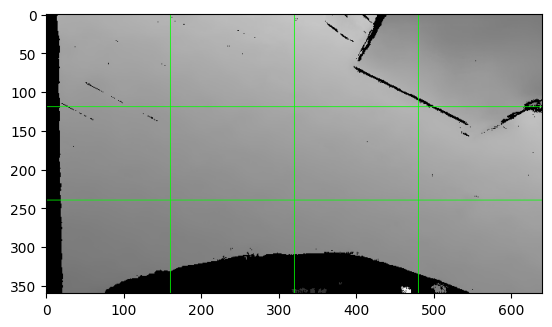

In [25]:
img_grid = draw_grid(img, (3,4))
plt.imshow(img_grid)
cv2.imwrite('regions_depth.jpg',img_grid)
